This notebook is to demonstrate the process of trading models with using feature selection methods.

In [48]:
#import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("Oil price.csv")

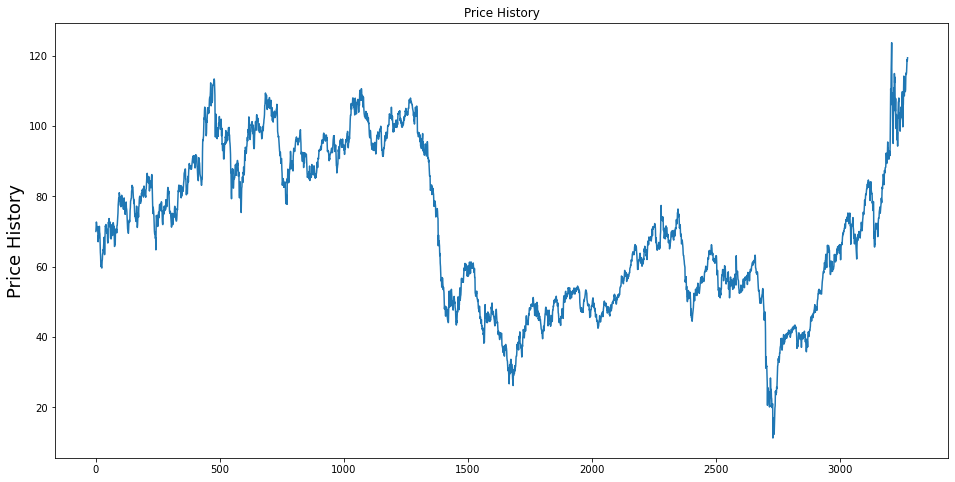

In [34]:
plt.figure(figsize=(16,8))
plt.title('Price History')
plt.plot(df[' value'])
plt.ylabel('Price History', fontsize=18)
plt.show()

In [35]:
price = df.filter([' value'])
dataset = price.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2620

In [36]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.52259832],
       [0.53469344],
       [0.54634389],
       ...,
       [0.95704452],
       [0.95375394],
       [0.961847  ]])

In [37]:
#Create the training data set and scaled training set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [38]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [39]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [40]:
#Train the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2560/2560 [==============================] - 26s 9ms/step - loss: 0.0016


In [41]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [42]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 6ms/step


In [43]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)

In [44]:
rmse

0.32898037939872465

C:\Users\50859\AppData\Local\Temp\ipykernel_28348\4064584448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


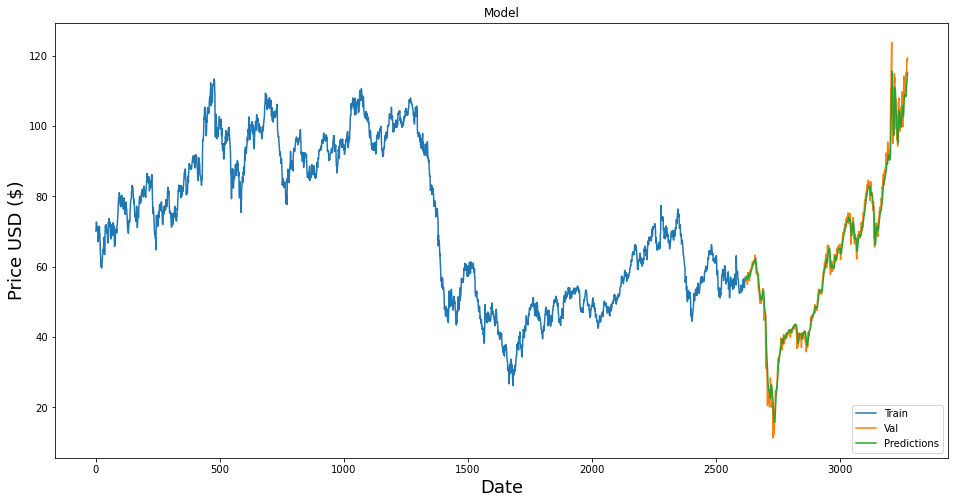

In [45]:
train = price[:training_data_len]
valid = price[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(train[' value'])
plt.plot(valid[[' value', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [47]:
last_60_days = price[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price =  scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 13ms/step
[[116.08457]]
